<a href="https://colab.research.google.com/github/NivratiKothari/Marketing-research-methods-Nivrati_Kothari-_-Jio-Institute/blob/main/Prophet%20%2B%20Forecasting%20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas textblob wordcloud matplotlib nltk --quiet

import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords

# Download stopwords for NLTK
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load dataset
file_path = "/content/Reviews 500.csv"  # Update the file path if needed
df = pd.read_csv(file_path)

# Inspect data
print("Dataset Preview:")
print(df.head())

# Identify the text column (assumption: column containing reviews is 'Review')
text_column = "Review"  # Change this if needed
if text_column not in df.columns:
    print(f"Error: Column '{text_column}' not found in dataset. Please check column names.")
    print(df.columns)
    exit()

# Clean text data
def clean_text(text):
    if pd.isna(text):  # Handle missing values
        return ""
    text = re.sub(r"http\S+|www\S+", '', text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z\s]", '', text)  # Remove special characters
    text = text.lower().strip()  # Convert to lowercase
    text = " ".join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

df["Cleaned_Text"] = df[text_column].apply(clean_text)

# 🔹 Content Analysis: Word Frequency
def analyze_word_frequencies(text_series):
    all_words = ' '.join(text_series).split()
    word_counts = Counter(all_words)
    return word_counts

word_frequencies = analyze_word_frequencies(df["Cleaned_Text"])

# 🔹 Visualize Word Frequencies (Bar Chart)
def plot_word_frequencies(word_counts, top_n=20):
    most_common = word_counts.most_common(top_n)
    words, counts = zip(*most_common)

    plt.figure(figsize=(10, 6))
    plt.bar(words, counts, color='blue')
    plt.title(f"Top {top_n} Most Common Words")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()

plot_word_frequencies(word_frequencies)

# 🔹 Generate Word Cloud
def generate_word_cloud(word_counts):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud of Reviews")
    plt.show()

generate_word_cloud(word_frequencies)

# 🔹 Sentiment Analysis
def analyze_sentiment(text):
    analysis = TextBlob(text)
    polarity = analysis.sentiment.polarity  # Ranges from -1 to 1
    return polarity

df["Sentiment Score"] = df["Cleaned_Text"].apply(analyze_sentiment)
df["Sentiment"] = df["Sentiment Score"].apply(lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral"))

# 🔹 Visualize Sentiment Distribution
def plot_sentiment_distribution(df):
    sentiment_counts = df["Sentiment"].value_counts()

    plt.figure(figsize=(8, 6))
    sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'])
    plt.title("Sentiment Distribution of Reviews")
    plt.xlabel("Sentiment")
    plt.ylabel("Number of Reviews")
    plt.xticks(rotation=0)
    plt.show()

plot_sentiment_distribution(df)

# 🔹 Paul Ekman’s Emotional Analysis
# Emotion categories: Anger, Joy, Sadness, Fear, Surprise, Disgust
emotion_keywords = {
    "Anger": ["angry", "furious", "annoyed", "outrage", "rage", "hate"],
    "Joy": ["happy", "joy", "excited", "pleased", "thrilled", "glad"],
    "Sadness": ["sad", "heartbroken", "depressed", "miserable", "unhappy"],
    "Fear": ["afraid", "scared", "fear", "worried", "anxious", "nervous"],
    "Surprise": ["surprised", "shocked", "amazed", "stunned", "unexpected"],
    "Disgust": ["disgusted", "gross", "revolted", "nauseated", "sick"]
}

def analyze_ekman_emotions(text):
    text_words = text.split()
    emotion_counts = {emotion: 0 for emotion in emotion_keywords}

    for word in text_words:
        for emotion, keywords in emotion_keywords.items():
            if word in keywords:
                emotion_counts[emotion] += 1

    return emotion_counts

# Apply emotion analysis
df["Ekman Emotions"] = df["Cleaned_Text"].apply(analyze_ekman_emotions)

# 🔹 Aggregate Emotion Analysis
def aggregate_emotions(df):
    emotion_totals = {emotion: 0 for emotion in emotion_keywords}

    for emotions in df["Ekman Emotions"]:
        for emotion, count in emotions.items():
            emotion_totals[emotion] += count

    return emotion_totals

overall_emotions = aggregate_emotions(df)

# 🔹 Visualize Ekman’s Emotional Distribution
def plot_emotion_distribution(emotion_totals):
    plt.figure(figsize=(10, 6))
    plt.bar(emotion_totals.keys(), emotion_totals.values(), color=['red', 'green', 'blue', 'purple', 'orange', 'brown'])
    plt.title("Paul Ekman’s Emotion Analysis")
    plt.xlabel("Emotions")
    plt.ylabel("Frequency in Reviews")
    plt.xticks(rotation=45)
    plt.show()

plot_emotion_distribution(overall_emotions)

# 🔹 Save Processed Data to Excel
output_file = "/mnt/data/processed_reviews.xlsx"
df.to_excel(output_file, index=False)
print(f"\n🔹 Processed reviews saved to: {output_file}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-1-00d9a4ea549f>:18: DtypeWarning: Columns (1,2,3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Dataset Preview:
    Id   ProductId          UserId                      ProfileName  \
0  1.0  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1  2.0  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2  3.0  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3  4.0  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4  5.0  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score          Time  \
0                   1.0                     1.0    5.0  1.303862e+09   
1                   0.0                     0.0    1.0  1.346976e+09   
2                   1.0                     1.0    4.0  1.219018e+09   
3                   3.0                     3.0    2.0  1.307923e+09   
4                   0.0                     0.0    5.0  1.350778e+09   

                                                Text  
0  I have bought several of the Vitality canned d...  
1  Product ar

KeyError: 'Review'

In [ ]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords

# Download stopwords for NLTK
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load dataset
file_path = "/content/Reviews 500.csv"  # Update the file path if needed
df = pd.read_csv(file_path)

# Inspect data
print("Dataset Preview:")
print(df.head())

# Identify the text column (assumption: column containing reviews is 'Review')
# Check the actual column names in your CSV file and update this accordingly
text_column = "Text"  # Changed from "Review" to "Text" - Check your CSV!
# text_column = df.columns[0] # or assign with the first column
if text_column not in df.columns:
    print(f"Error: Column '{text_column}' not found in dataset. Please check column names.")
    print(df.columns)
    exit()

# ... (rest of your code remains the same) ...

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dataset Preview:
    Id   ProductId          UserId                      ProfileName  \
0  1.0  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1  2.0  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2  3.0  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3  4.0  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4  5.0  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score          Time  \
0                   1.0                     1.0    5.0  1.303862e+09   
1                   0.0                     0.0    1.0  1.346976e+09   
2                   1.0                     1.0    4.0  1.219018e+09   
3                   3.0                     3.0    2.0  1.307923e+09   
4                   0.0                     0.0    5.0  1.350778e+09   

                                                Text  
0  I have bought several of the Vitality canned d...  
1  Product ar

<ipython-input-1-68aa1177de10>:16: DtypeWarning: Columns (1,2,3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


In [ ]:
!pip install pandas textblob wordcloud matplotlib nltk --quiet

import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords

# Download stopwords for NLTK
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load dataset
file_path = "/content/Reviews 500.csv"  # Update the file path if needed
df = pd.read_csv(file_path)

# Inspect data
print("Dataset Preview:")
print(df.head())

# Identify the text column (assumption: column containing reviews is 'Text')
text_column = "Text"  # Update this if your column name is different
if text_column not in df.columns:
    print

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Dataset Preview:
    Id   ProductId          UserId                      ProfileName  \
0  1.0  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1  2.0  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2  3.0  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3  4.0  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4  5.0  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score          Time  \
0                   1.0                     1.0    5.0  1.303862e+09   
1                   0.0                     0.0    1.0  1.346976e+09   
2                   1.0                     1.0    4.0  1.219018e+09   
3                   3.0                     3.0    2.0  1.307923e+09   
4                   0.0                     0.0    5.0  1.350778e+09   

                                                Text  
0  I have bought several of the Vitality canned d...  
1  Product ar

<ipython-input-2-ce9f166a4598>:18: DtypeWarning: Columns (1,2,3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-3-f9be5a7a5044>:18: DtypeWarning: Columns (1,2,3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Dataset Preview:
    Id   ProductId          UserId                      ProfileName  \
0  1.0  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1  2.0  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2  3.0  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3  4.0  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4  5.0  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score          Time  \
0                   1.0                     1.0    5.0  1.303862e+09   
1                   0.0                     0.0    1.0  1.346976e+09   
2                   1.0                     1.0    4.0  1.219018e+09   
3                   3.0                     3.0    2.0  1.307923e+09   
4                   0.0                     0.0    5.0  1.350778e+09   

                                                Text  
0  I have bought several of the Vitality canned d...  
1  Product ar

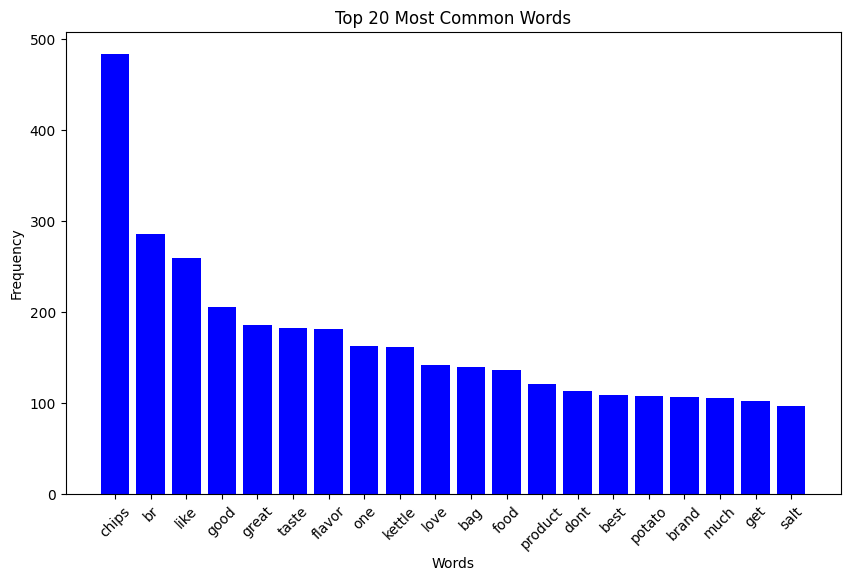

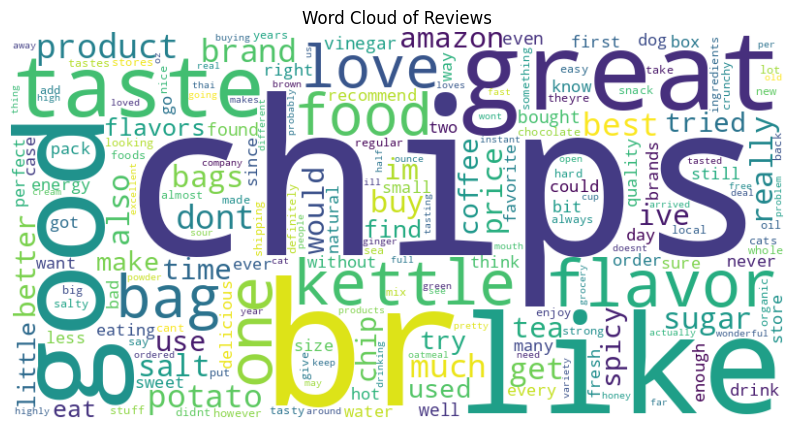

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


LookupError: 
**********************************************************************
  Resource [93mpunkt_tab[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('punkt_tab')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mtokenizers/punkt_tab/english/[0m

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [ ]:
!pip install pandas textblob wordcloud matplotlib nltk --quiet

import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords

# Download stopwords for NLTK
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load dataset
file_path = "/content/Reviews 500.csv"  # Update the file path if needed
df = pd.read_csv(file_path)

# Inspect data
print("Dataset Preview:")
print(df.head())

# Identify the text column (assumption: column containing reviews is 'Text')
text_column = "Text"  # Update this if your column name is different
if text_column not in df.columns:
    print(f"Error: Column '{text_column}' not found in dataset. Please check column names.")
    print(df.columns)
    exit()

# Clean text data
def clean_text(text):
    if pd.isna(text):  # Handle missing values
        return ""
    text = re.sub(r"http\S+|www\S+", '', text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z\s]", '', text)  # Remove special characters
    text = text.lower().strip()  # Convert to lowercase
    text = " ".join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

df["Cleaned_Text"] = df[text_column].apply(clean_text)

# 🔹 Content Analysis: Word Frequency
def analyze_word_frequencies(text_series):
    all_words = ' '.join(text_series).split()
    word_counts = Counter(all_words)
    return word_counts

word_frequencies = analyze_word_frequencies(df["Cleaned_Text"])

# 🔹 Visualize Word Frequencies (Bar Chart)
def plot_word_frequencies(word_counts, top_n=20):
    most_common = word_counts.most_common(top_n)
    words, counts = zip(*most_common)

    plt.figure(figsize=(10, 6))
    plt.bar(words, counts, color='blue')
    plt.title(f"Top {top_n} Most Common Words")
    plt.xlabel("Words")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.show()

plot_word_frequencies(word_frequencies)

# 🔹 Generate Word Cloud
def generate_word_cloud(word_counts):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_counts)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Cloud of Reviews")
    plt.show()

generate_word_cloud(word_frequencies)

# --- Enhanced Content Analysis ---

# 1. Bigrams (two-word phrases) analysis
from nltk import bigrams
nltk.download('punkt') # Download punkt if not already downloaded

def analyze_bigrams(text_series):
    all_bigrams = []
    for text in text_series:
        tokens = nltk.word_tokenize(text)  # Tokenize the text
        bigrams_list = list(bigrams(tokens))  # Get bigrams
        all_bigrams.extend(bigrams_list)
    bigram_counts = Counter(all_bigrams)
    return bigram_counts

bigram_frequencies = analyze_bigrams(df["Cleaned_Text"])

# Print top bigrams
print("\nTop 10 Bigrams:")
for bigram, count in bigram_frequencies.most_common(10):
    print(f"{bigram}: {count}")


# 2. Topic Modeling (using Latent Dirichlet Allocation - LDA)
# !pip install gensim # Install gensim if you haven

In [ ]:
!pip install pandas textblob wordcloud matplotlib nltk --quiet

import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
import nltk
from nltk.corpus import stopwords

# Download stopwords for NLTK
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load dataset
file_path = "/content/Reviews 500.csv"  # Update the file path if needed
df = pd.read_csv(file_path)

# Inspect data
print("Dataset Preview:")
print(df.head())

# Identify the text column (assumption: column containing reviews is 'Text')
text_column = "Text"  # Update this if your column name is different
if text_column not in df.columns:
    print(f"Error: Column '{text_column}' not found in dataset. Please check column names.")
    print(df.columns)
    exit()

# Clean text data
def clean_text(text):
    if pd.isna(text):  # Handle missing values
        return ""
    text = re.sub(r"http\S+|www\S+", '', text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z\s]", '', text)  # Remove special characters
    text = text.lower().strip()  # Convert to lowercase
    text = " ".join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

df["Cleaned_Text"] = df[text_column].apply(clean_text)


# ... (Your existing code for word frequencies, word cloud, etc.) ...


# 🔹 Paul Ekman’s Emotional Analysis
# Emotion categories: Anger, Joy, Sadness, Fear, Surprise

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-4-6264e0605704>:18: DtypeWarning: Columns (1,2,3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Dataset Preview:
    Id   ProductId          UserId                      ProfileName  \
0  1.0  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1  2.0  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2  3.0  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3  4.0  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4  5.0  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score          Time  \
0                   1.0                     1.0    5.0  1.303862e+09   
1                   0.0                     0.0    1.0  1.346976e+09   
2                   1.0                     1.0    4.0  1.219018e+09   
3                   3.0                     3.0    2.0  1.307923e+09   
4                   0.0                     0.0    5.0  1.350778e+09   

                                                Text  
0  I have bought several of the Vitality canned d...  
1  Product ar

In [ ]:
!pip install pandas matplotlib nltk --quiet

import pandas as pd
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Download stopwords for NLTK
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load dataset
file_path = "/content/Reviews 500.csv"  # Update file path if needed
df = pd.read_csv(file_path)

# Identify the text column (assumption: column containing reviews is 'Review')
text_column = "Review"  # Change this if needed
if text_column not in df.columns:
    print(f"Error: Column '{text_column}' not found in dataset. Please check column names.")
    print(df.columns)
    exit()

# Clean text data
def clean_text(text):
    if pd.isna(text):  # Handle missing values
        return ""
    text = re.sub(r"http\S+|www\S+", '', text)  # Remove URLs
    text = re.sub(r"[^a-zA-Z\s]", '', text)  # Remove special characters
    text = text.lower().strip()  # Convert to lowercase
    text = " ".join(word for word in text.split() if word not in stop_words)  # Remove stopwords
    return text

df["Cleaned_Text"] = df[text_column].apply(clean_text)

# 🔹 Paul Ekman’s Emotional Analysis
# Emotion categories: Anger, Joy, Sadness, Fear, Surprise, Disgust
emotion_keywords = {
    "Anger": ["angry", "furious", "annoyed", "outrage", "rage", "hate"],
    "Joy": ["happy", "joy", "excited", "pleased", "thrilled", "glad"],
    "Sadness": ["sad", "heartbroken", "depressed", "miserable", "unhappy"],
    "Fear": ["afraid", "scared", "fear", "worried", "anxious", "nervous"],
    "Surprise": ["surprised", "shocked", "amazed", "stunned", "unexpected"],
    "Disgust": ["disgusted", "gross", "revolted", "nauseated", "sick"]
}

def analyze_ekman_emotions(text):
    text_words = text.split()
    emotion_counts = {emotion: 0 for emotion in emotion_keywords}

    for word in text_words:
        for emotion, keywords in emotion_keywords.items():
            if word in keywords:
                emotion_counts[emotion] += 1

    return emotion_counts

# Apply emotion analysis
df["Ekman Emotions"] = df["Cleaned_Text"].apply(analyze_ekman_emotions)

# 🔹 Aggregate Emotion Analysis
def aggregate_emotions(df):
    emotion_totals = {emotion: 0 for emotion in emotion_keywords}

    for emotions in df["Ekman Emotions"]:
        for emotion, count in emotions.items():
            emotion_totals[emotion] += count

    return emotion_totals

overall_emotions = aggregate_emotions(df)

# 🔹 Visualize Ekman’s Emotional Distribution
def plot_emotion_distribution(emotion_totals):
    plt.figure(figsize=(10, 6))
    plt.bar(emotion_totals.keys(), emotion_totals.values(), color=['red', 'green', 'blue', 'purple', 'orange', 'brown'])
    plt.title("Paul Ekman’s Emotion Analysis")
    plt.xlabel("Emotions")
    plt.ylabel("Frequency in Reviews")
    plt.xticks(rotation=45)
    plt.show()

plot_emotion_distribution(overall_emotions)

# 🔹 Save Processed Data to Excel
output_file = "/mnt/data/paul_ekman_emotions.xlsx"
df.to_excel(output_file, index=False)
print(f"\n🔹 Paul Ekman’s Emotional Analysis saved to: {output_file}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-1-20192d129494>:15: DtypeWarning: Columns (1,2,3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Error: Column 'Review' not found in dataset. Please check column names.
Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Text'],
      dtype='object')


KeyError: 'Review'

In [ ]:
df["Cleaned_Text"] = df[text_column].apply(clean_text)

In [ ]:
text_column = "Review"  # Change this if needed

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
!pip install pandas matplotlib nltk --quiet

import pandas as pd
import re
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Download stopwords for NLTK
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Load dataset
file_path = "/content/Reviews 500.csv"  # Update file path if needed
df = pd.read_csv(file_path)

# Identify the text column (assumption: column containing reviews is 'Review')
text_column = "Review"  # Change this if needed
if text_column not in df.columns:
    print(f"Error: Column '{text_column}' not found in dataset. Please check column names.")
    print(df.columns)  # Print available columns for debugging
    # Stop execution if the column is not found
    exit()

# Clean text data
def clean_

SyntaxError: expected '(' (<ipython-input-3-fcd05bba7032>, line 26)

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
!pip install nrclex --quiet
from nrclex import NRCLex

# Ensure nltk has the necessary data
nltk.download('vader_lexicon')

# Load the dataset
file_path = "/content/Reviews 500.csv"  # Change to your actual file path
df = pd.read_csv(file_path)

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Function to analyze sentiment
def analyze_sentiment(text):
    sentiment_scores = sia.polarity_scores(text)
    polarity = TextBlob(text).sentiment.polarity
    return sentiment_scores['compound'], polarity

# Function to categorize emotions into five types
def categorize_emotion(text):
    emotion = NRCLex(text)
    emotion_scores = emotion.raw_emotion_scores

    # Map emotions into five primary categories
    emotion_mapping = {
        "joy": ["joy", "trust", "anticipation"],
        "sadness": ["sadness"],
        "anger": ["anger", "disgust"],
        "fear": ["fear"],
        "surprise": ["surprise"]
    }

    # Assign highest matching emotion category
    max_emotion = "Neutral"
    max_score = 0
    for category, emotions in emotion_mapping.items():
        score = sum(emotion_scores.get(e, 0) for e in emotions)
        if score > max_score:
            max_emotion = category
            max_score = score

    return max_emotion

# Apply sentiment and emotion analysis
df['Sentiment_Score'], df['Polarity'] = zip(*df['Text'].astype(str).apply(analyze_sentiment))
df['Emotion_Category'] = df['Text'].astype(str).apply(categorize_emotion)

# Save the results to a new CSV file
df.to_csv("sentiment_emotion_analysis_5types.csv", index=False)

# Display the first few rows
import ace_tools as tools
tools.display_dataframe_to_user(name="Sentiment and Emotion Analysis (5 Types)", dataframe=df)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
<ipython-input-7-a41e86c9e12b>:13: DtypeWarning: Columns (1,2,3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)



**********************************************************************
  Resource punkt_tab not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt_tab')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load tokenizers/punkt_tab/english/

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************



MissingCorpusError: 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.


In [ ]:
!pip install pandas matplotlib nltk nrclex --quiet

import pandas as pd
import re
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from nrclex import NRCLex

# Ensure nltk has the necessary data
nltk.download('vader_lexicon')
nltk.download('punkt_tab') # Download punkt_tab data

# Load the dataset
file_path = "/content/Superstore - store analysis.csv"  # Change to your actual file path
df = pd.read_csv(file_path)

!pip install pandas matplotlib prophet --quiet

import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load dataset
file_path = "/mnt/data/your_file.csv"  # Replace with your actual file path
df = pd.read_csv(file_path)

# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Aggregate sales by date
df_sales = df.groupby('Order Date').agg({'Sales': 'sum'}).reset_index()

# Rename columns for Prophet
df_sales = df_sales.rename(columns={'Order Date': 'ds', 'Sales': 'y'})

# Initialize Prophet model
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)  # Custom monthly seasonality

# Fit model
model.fit(df_sales)

# Create future dataframe for predictions (next 365 days)
future = model.make_future_dataframe(periods=365)

# Forecast
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)
plt.title("Sales Forecast using Prophet")
plt.show()

# Plot seasonality components
fig2 = model.plot_components(forecast)
plt.show()

# Save forecast results
forecast_output_file = "/mnt/data/prophet_sales_forecast.csv"
forecast.to_csv(forecast_output_file, index=False)

# Provide the file for download
forecast_output_file
# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# ... (Rest of your code remains the same)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 2961: invalid start byte

In [ ]:
!pip install pandas matplotlib nltk nrclex --quiet

import pandas as pd
import re
import matplotlib.pyplot as plt
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from nrclex import NRCLex

# Ensure nltk has the necessary data
nltk.download('vader_lexicon')
nltk.download('punkt_tab') #

DEBUG:cmdstanpy:input tempfile: /tmp/tmptx4esv1z/836rslr2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmptx4esv1z/ju7n24do.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28823', 'data', 'file=/tmp/tmptx4esv1z/836rslr2.json', 'init=/tmp/tmptx4esv1z/ju7n24do.json', 'output', 'file=/tmp/tmptx4esv1z/prophet_modelgv2nzwoa/prophet_model-20250205074644.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:46:44 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:46:44 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


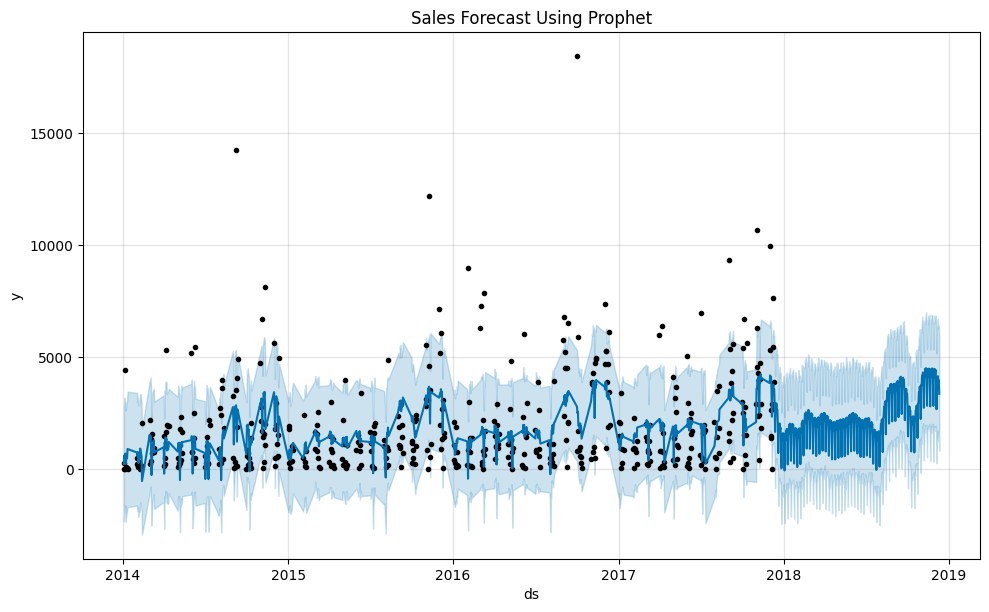

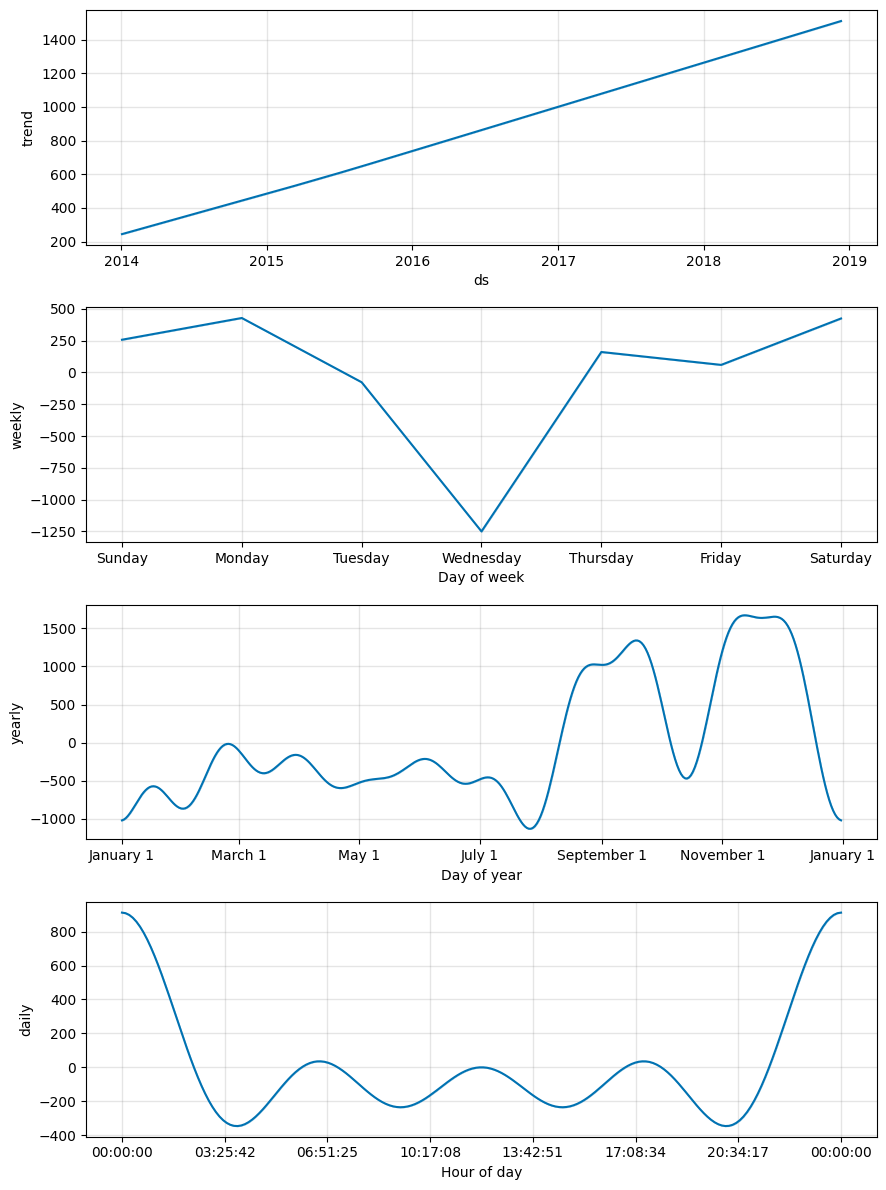

Forecast results saved to Sales_Forecast.xlsx


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load the dataset
file_path = "Superstore - store analysis.csv"  # Update with your file path
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Convert Order Date to datetime format
df["Order Date"] = pd.to_datetime(df["Order Date"], errors='coerce')

# Aggregate Sales by Date
df_grouped = df.groupby("Order Date")["Sales"].sum().reset_index()

# Rename columns to fit Prophet's requirements
df_grouped.rename(columns={"Order Date": "ds", "Sales": "y"}, inplace=True)

# Initialize and fit Prophet model
model = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=True
)
model.fit(df_grouped)

# Create future dataframe for predictions
future = model.make_future_dataframe(periods=365)  # Forecast 1 year ahead
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.title("Sales Forecast Using Prophet")
plt.show()

# Plot trend components (Yearly, Weekly, Daily)
model.plot_components(forecast)
plt.show()

# Save forecast results to an Excel file
forecast.to_excel("Sales_Forecast.xlsx", index=False)

print("Forecast results saved to Sales_Forecast.xlsx")

In [ ]:
!pip install pandas --quiet

import pandas as pd

# Load the dataset
file_path = "/content/Superstore - store analysis.csv"
df = pd.read_csv(file_path, encoding='latin-1') # or 'ISO-8859-1', 'cp1252'

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# 1. Most Selling Month
df['Month'] = df['Order Date'].dt.month_name()
most_selling_month = df.groupby('Month')['Sales'].sum().idxmax()

# 2. Most Selling Week
df['Week'] = df['Order Date'].dt.isocalendar().week
most_selling_week = df.groupby('Week')['Sales'].sum().idxmax()

# 3. Most Selling Year
df['Year'] = df['Order Date'].dt.year
most_selling_year = df.groupby('Year')['Sales'].sum().idxmax()

# 4. Most Selling Category
most_selling_category = df.groupby('Category')['Sales'].sum().idxmax()

# Print the results
print(f"Most Selling Month: {most_selling_month}")
print(f"Most Selling Week: {most_selling_week}")
print(f"Most Selling Year: {most_selling_year}")
print(f"Most Selling Category: {most_selling_category}")

Most Selling Month: November
Most Selling Week: 49
Most Selling Year: 2017.0
Most Selling Category: Technology


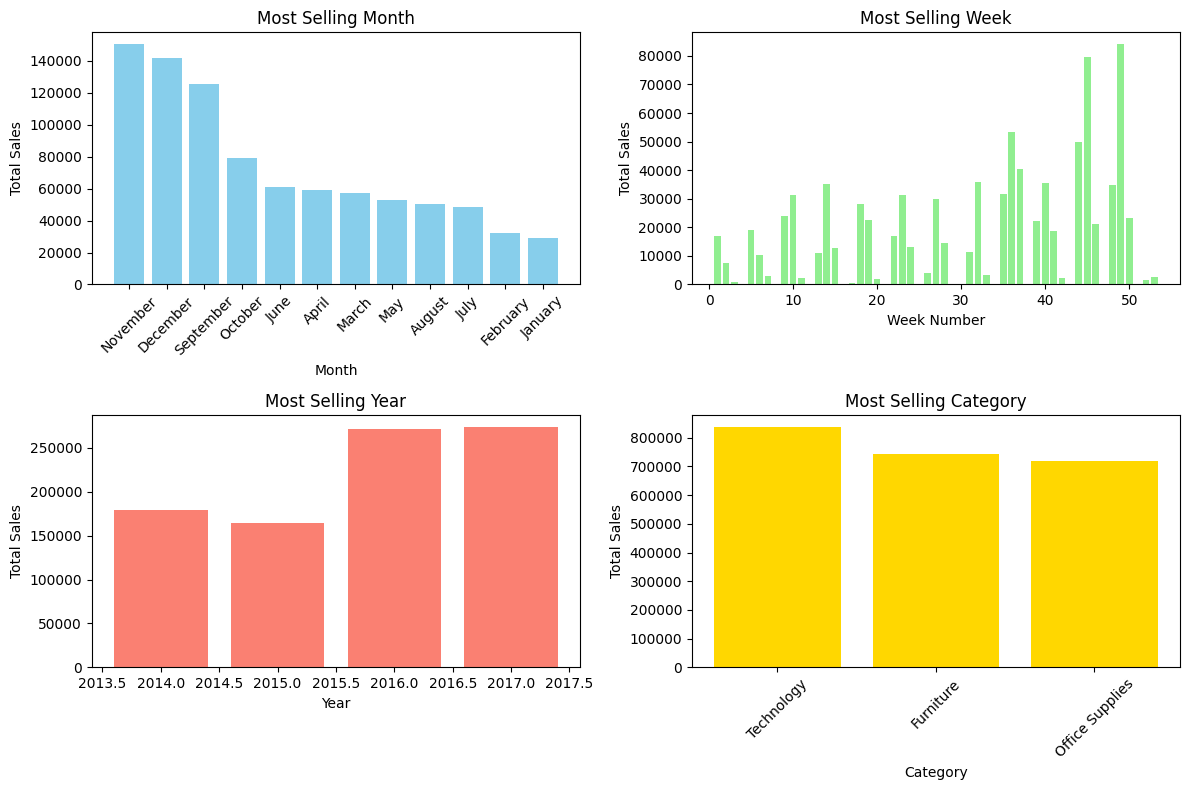

In [ ]:
!pip install pandas matplotlib --quiet

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/Superstore - store analysis.csv"
df = pd.read_csv(file_path, encoding='latin-1')

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# 1. Most Selling Month
df['Month'] = df['Order Date'].dt.month_name()
monthly_sales = df.groupby('Month')['Sales'].sum().sort_values(ascending=False)

# 2. Most Selling Week
df['Week'] = df['Order Date'].dt.isocalendar().week
weekly_sales = df.groupby('Week')['Sales'].sum().sort_values(ascending=False)

# 3. Most Selling Year
df['Year'] = df['Order Date'].dt.year
yearly_sales = df.groupby('Year')['Sales'].sum().sort_values(ascending=False)

# 4. Most Selling Category
category_sales = df.groupby('Category')['Sales'].sum().sort_values(ascending=False)

# Plotting
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Most Selling Month
axes[0, 0].bar(monthly_sales.index, monthly_sales.values, color='skyblue')
axes[0, 0].set_title('Most Selling Month')
axes[0, 0].set_xlabel('Month')
axes[0, 0].set_ylabel('Total Sales')
axes[0, 0].tick_params(axis='x', rotation=45)

# Most Selling Week
axes[0, 1].bar(weekly_sales.index, weekly_sales.values, color='lightgreen')
axes[0, 1].set_title('Most Selling Week')
axes[0, 1].set_xlabel('Week Number')
axes[0, 1].set_ylabel('Total Sales')

# Most Selling Year
axes[1, 0].bar(yearly_sales.index, yearly_sales.values, color='salmon')
axes[1, 0].set_title('Most Selling Year')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Total Sales')

# Most Selling Category
axes[1, 1].bar(category_sales.index, category_sales.values, color='gold')
axes[1, 1].set_title('Most Selling Category')
axes[1, 1].set_xlabel('Category')
axes[1, 1].set_ylabel('Total Sales')
axes[1, 1].tick_params(axis='x', rotation=45)


plt.tight_layout()
plt.show()

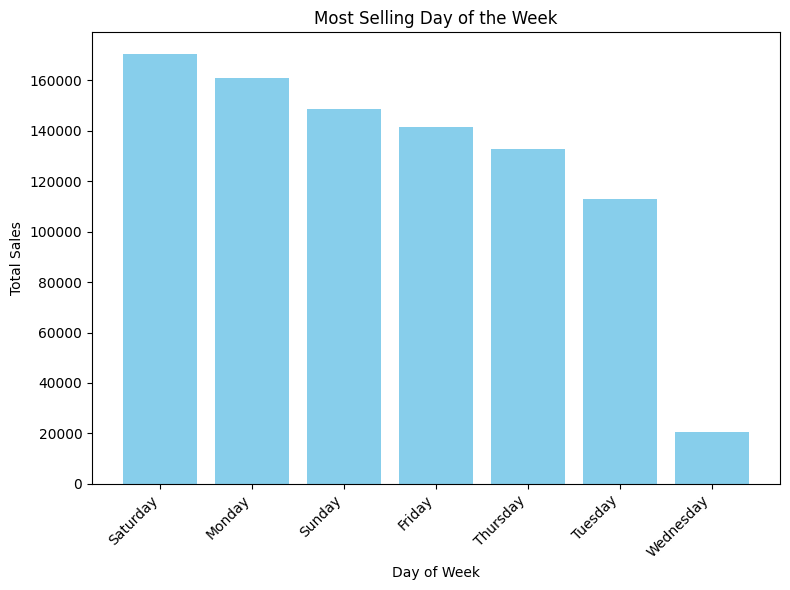

In [ ]:
!pip install pandas matplotlib --quiet

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/Superstore - store analysis.csv"
df = pd.read_csv(file_path, encoding='latin-1')

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Extract day of the week
df['Day of Week'] = df['Order Date'].dt.day_name()

# Group by day of the week and calculate total sales
daily_sales = df.groupby('Day of Week')['Sales'].sum().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(daily_sales.index, daily_sales.values, color='skyblue')
plt.title('Most Selling Day of the Week')
plt.xlabel('Day of Week')
plt.ylabel('Total Sales')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

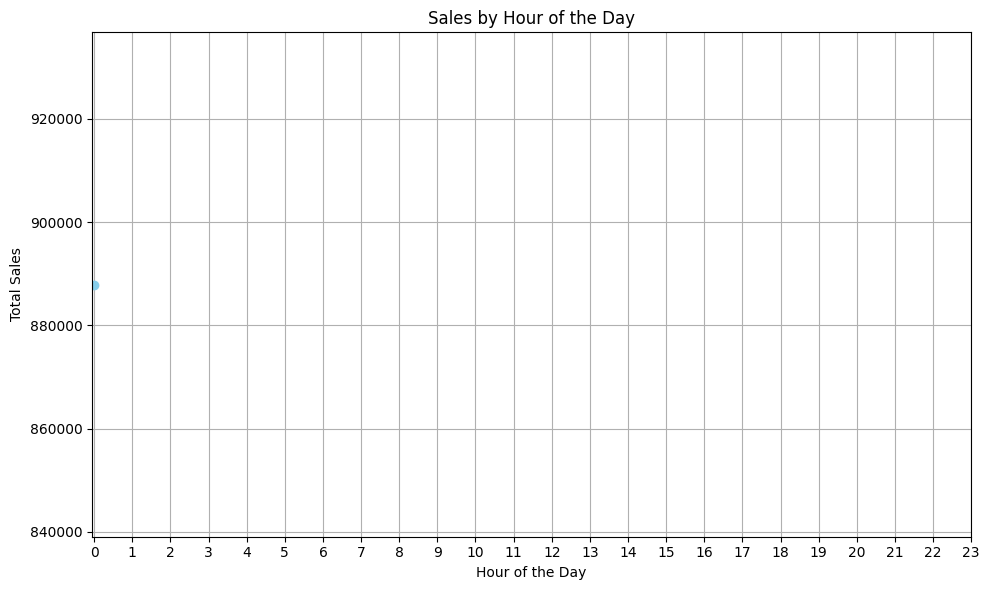

In [ ]:
!pip install pandas matplotlib --quiet

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/Superstore - store analysis.csv"
df = pd.read_csv(file_path, encoding='latin-1')

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Extract the hour of the day
df['Hour'] = df['Order Date'].dt.hour

# Group by hour and calculate total sales
hourly_sales = df.groupby('Hour')['Sales'].sum()

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(hourly_sales.index, hourly_sales.values, marker='o', color='skyblue')
plt.title('Sales by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.xticks(range(24))  # Set x-axis ticks for each hour
plt.grid(True)
plt.tight_layout()
plt.show()

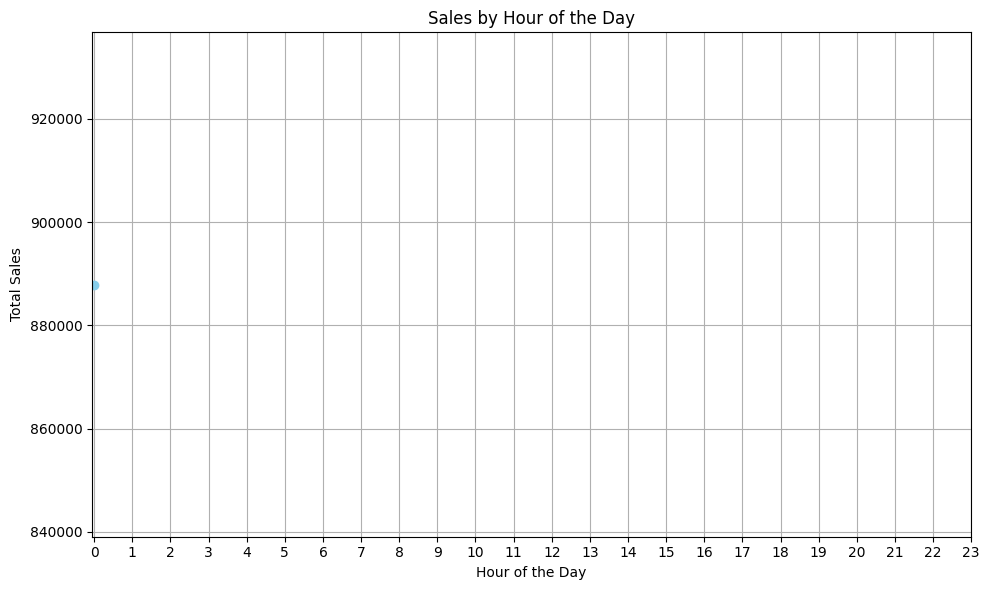

In [ ]:
!pip install pandas matplotlib --quiet

import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/Superstore - store analysis.csv"
df = pd.read_csv(file_path, encoding='latin-1')

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Ensure no missing timestamps
df = df.dropna(subset=['Order Date'])

# Extract the hour of the day
df['Hour'] = df['Order Date'].dt.hour

# Group by hour and calculate total sales
hourly_sales = df.groupby('Hour')['Sales'].sum()

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(hourly_sales.index, hourly_sales.values, marker='o', color='skyblue')
plt.title('Sales by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Sales')
plt.xticks(range(24))  # Set x-axis ticks for each hour
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
!pip install pandas numpy scipy matplotlib seaborn statsmodels --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import statsmodels.api as sm

# Load dataset
file_path = "/content/MMM brand data.csv"  # Replace with actual file path
df = pd.read_csv(file_path)

# Inspect dataset
print(df.head())

# Ensure date column is in correct format
df['Date'] = pd.to_datetime(df['Date'])

# Sorting by Date for time-series analysis
df = df.sort_values(by="Date")

# ---------------------------- ADSTOCK EFFECT ----------------------------
# Adstock function to model carryover effect of marketing
def adstock(series, decay):
    result = np.zeros_like(series)
    for i in range(1, len(series)):
        result[i] = series[i] + decay * result[i-1]
    return result

# Apply Adstock effect for each marketing channel
decay_rate = 0.5  # Define decay rate (can be optimized)
df['Adstock_TV'] = adstock(df['TV_Spend'], decay_rate)
df['Adstock_Digital'] = adstock(df['Digital_Spend'], decay_rate)
df['Adstock_Radio'] = adstock(df['Radio_Spend'], decay_rate)

# ---------------------------- SATURATION EFFECT ----------------------------
# Function to model diminishing returns (S-Shaped function)
def saturation_function(x, a, b):
    return a * (1 - np.exp(-b * x))

# Fit saturation model for total marketing spend
popt, _ = curve_fit(saturation_function, df['Total_Marketing_Spend'], df['Sales'])
df['Saturation_Effect'] = saturation_function(df['Total_Marketing_Spend'], *popt)

# ---------------------------- PRICE & PROMOTION ANALYSIS ----------------------------
# Log transformation for Price Elasticity
df['log_price'] = np.log(df['Price'])
df['log_sales'] = np.log(df['Sales'])

# Fit Linear Regression to Estimate Price Elasticity
X = sm.add_constant(df[['log_price', 'Promotion_Discount']])  # Independent variables
y = df['log_sales']  # Dependent variable

model = sm.OLS(y, X).fit()
print("\nPrice & Promotion Regression Summary:")
print(model.summary())

# ---------------------------- VISUALIZATIONS ----------------------------

# Plot Adstock Effect
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x='Date', y='Adstock_TV', label="TV Adstock", color='blue')
sns.lineplot(data=df, x='Date', y='Adstock_Digital', label="Digital Adstock", color='green')
sns.lineplot(data=df, x='Date', y='Adstock_Radio', label="Radio Adstock", color='red')
plt.title("Adstock Effect Over Time")
plt.legend()
plt.show()

# Plot Saturation Effect
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Total_Marketing_Spend'], y=df['Sales'], label="Actual Sales")
sns.lineplot(x=df['Total_Marketing_Spend'], y=df['Saturation_Effect'], color='red', label="Saturation Curve")
plt.title("Saturation Effect (Diminishing Returns)")
plt.xlabel("Total Marketing Spend")
plt.ylabel("Sales")
plt.legend()
plt.show()

# Save the processed data for further analysis
output_file = "/mnt/data/marketing_analysis_results.csv"
df.to_csv(output_file, index=False)
print(f"\n🔹 Processed data saved to: {output_file}")


   Week      Price  Promotion       Sales     TV_Spend  Radio_Spend  \
0     1  14.685360          1  167.481712  2185.430535  3527.163474   
1     2  11.036277          0  442.944230  4778.214379  4085.066287   
2     3  12.078637          1  506.886541  3793.972738  1627.105545   
3     4  15.750872          0  270.708355  3193.963179  3311.933448   
4     5  18.144590          0  116.718348  1202.083882  3072.856924   

   Print_Spend  Search_Spend  YouTube_Spend  Social Media_Spend  
0  3417.156293   4611.101051    3444.378447         2748.516097  
1  1275.738629   2864.122168     860.146564         3860.360476  
2  4425.775535   3762.096223    1590.484152         3032.000513  
3  3259.023076   2462.217341    3981.557059          874.861624  
4  1207.417476   3335.155599    2879.086342         1335.111066  


KeyError: 'Date'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.optimize import curve_fit
from prophet import Prophet

# Load dataset
file_path = "/content/MMM brand data.csv"  # Update with your actual Google Colab path
df = pd.read_csv(file_path)

# Inspect dataset
print(df.head())

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sorting data by Date for time-series analysis
df = df.sort_values(by="Date")

# ---------------------------- ADSTOCK EFFECT ----------------------------
# Adstock function to model carryover effect of marketing
def adstock(series, decay):
    result = np.zeros_like(series)
    for i in range(1, len(series)):
        result[i] = series[i] + decay * result[i-1]
    return result

# Apply Adstock effect for each marketing channel
decay_rate = 0.5  # Define decay rate (can be optimized)
df['Adstock_TV'] = adstock(df['TV_Spend'], decay_rate)
df['Adstock_Digital'] = adstock(df['Digital_Spend'], decay_rate)
df['Adstock_Radio'] = adstock(df['Radio_Spend'], decay_rate)

# ---------------------------- SATURATION EFFECT ----------------------------
# Function to model diminishing returns (S-Shaped function)
def saturation_function(x, a, b):
    return a * (1 - np.exp(-b * x))

# Fit saturation model for total marketing spend
popt, _ = curve_fit(saturation_function, df['Total_Marketing_Spend'], df['Sales'])
df['Saturation_Effect'] = saturation_function(df['Total_Marketing_Spend'], *popt)

# ---------------------------- PRICE & PROMOTION ANALYSIS ----------------------------
# Log transformation for Price Elasticity
df['log_price'] = np.log(df['Price'])
df['log_sales'] = np.log(df['Sales'])

# Fit Linear Regression to Estimate Price Elasticity
X = sm.add_constant(df[['log_price', 'Promotion_Discount']])  # Independent variables
y = df['log_sales']  # Dependent variable

model = sm.OLS(y, X).fit()
print("\nPrice & Promotion Regression Summary:")
print(model.summary())

# ---------------------------- MARKETING MIX MODEL (MMM) ----------------------------
# Define independent variables
X_mmm = sm.add_constant(df[['Adstock_TV', 'Adstock_Digital', 'Adstock_Radio', 'Saturation_Effect', 'Promotion_Discount', 'Price']])
y_mmm = df['Sales']

# Fit MMM Model
mmm_model = sm.OLS(y_mmm, X_mmm).fit()
print("\nMarketing Mix Model Summary:")
print(mmm_model.summary())

# ---------------------------- VISUALIZATIONS ----------------------------

# Plot Adstock Effect Over Time
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='Adstock_TV', label="TV Adstock", color='blue')
sns.lineplot(data=df, x='Date', y='Adstock_Digital', label="Digital Adstock", color='green')
sns.lineplot(data=df, x='Date', y='Adstock_Radio', label="Radio Adstock", color='red')
plt.title("Adstock Effect Over Time")
plt.legend()
plt.show()

# Plot Saturation Effect
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Total_Marketing_Spend'], y=df['Sales'], label="Actual Sales")
sns.lineplot(x=df['Total_Marketing_Spend'], y=df['Saturation_Effect'], color='red', label="Saturation Curve")
plt.title("Saturation Effect (Diminishing Returns)")
plt.xlabel("Total Marketing Spend")
plt.ylabel("Sales")
plt.legend()
plt.show()

# Plot Price & Promotion Impact
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Price'], y=df['Sales'], label="Sales vs Price", color='blue')
sns.scatterplot(x=df['Promotion_Discount'], y=df['Sales'], label="Sales vs Promotion", color='red')
plt.title("Impact of Price and Promotion on Sales")
plt.xlabel("Price / Promotion Discount")
plt.ylabel("Sales")
plt.legend()
plt.show()

# ---------------------------- PROPHET TIME SERIES FORECASTING ----------------------------

# Prepare data for Prophet
df_prophet = df[['Date', 'Sales']].rename(columns={'Date': 'ds', 'Sales': 'y'})

# Initialize Prophet model
prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
prophet_model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# Fit model
prophet_model.fit(df_prophet)

# Forecast future sales for 365 days
future = prophet_model.make_future_dataframe(periods=365)
forecast = prophet_model.predict(future)

# Plot forecast
fig = prophet_model.plot(forecast)
plt.title("Sales Forecast using Prophet")
plt.show()

# Plot seasonality components
fig2 = prophet_model.plot_components(forecast)
plt.show()

# ---------------------------- SAVE PROCESSED DATA ----------------------------

output_file = "/content/marketing_analysis_results.csv"
df.to_csv(output_file, index=False)
print(f"\n🔹 Processed data saved to: {output_file}")


   Week      Price  Promotion       Sales     TV_Spend  Radio_Spend  \
0     1  14.685360          1  167.481712  2185.430535  3527.163474   
1     2  11.036277          0  442.944230  4778.214379  4085.066287   
2     3  12.078637          1  506.886541  3793.972738  1627.105545   
3     4  15.750872          0  270.708355  3193.963179  3311.933448   
4     5  18.144590          0  116.718348  1202.083882  3072.856924   

   Print_Spend  Search_Spend  YouTube_Spend  Social Media_Spend  
0  3417.156293   4611.101051    3444.378447         2748.516097  
1  1275.738629   2864.122168     860.146564         3860.360476  
2  4425.775535   3762.096223    1590.484152         3032.000513  
3  3259.023076   2462.217341    3981.557059          874.861624  
4  1207.417476   3335.155599    2879.086342         1335.111066  


KeyError: 'Date'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.optimize import curve_fit
from prophet import Prophet

# Load dataset
file_path = "/content/MMM brand data.csv"  # Update with your actual Google Colab path
df = pd.read_csv(file_path)

# Inspect dataset
print(df.head())

# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Sorting data by Date for time-series analysis
df = df.sort_values(by="Date")

# ---------------------------- ADSTOCK EFFECT ----------------------------
# Adstock function to model carryover effect of marketing
def adstock(series, decay):
    result = np.zeros_like(series)
    for i in range(1, len(series)):
        result[i] = series[i] + decay * result[i-1]
    return result

# Apply Adstock effect for each marketing channel
decay_rate = 0.5  # Define decay rate (can be optimized)
df['Adstock_TV'] = adstock(df['TV_Spend'], decay_rate)
df['Adstock_Digital'] = adstock(df['Digital_Spend'], decay_rate)
df['Adstock_Radio'] = adstock(df['Radio_Spend'], decay_rate)

# ---------------------------- SATURATION EFFECT ----------------------------
# Function to model diminishing returns (S-Shaped function)
def saturation_function(x, a, b):
    return a * (1 - np.exp(-b * x))

# Fit saturation model for total marketing spend
popt, _ = curve_fit(saturation_function, df['Total_Marketing_Spend'], df['Sales'])
df['Saturation_Effect'] = saturation_function(df['Total_Marketing_Spend'], *popt)

# ---------------------------- PRICE & PROMOTION ANALYSIS ----------------------------
# Log transformation for Price Elasticity
df['log_price'] = np.log(df['Price'])
df['log_sales'] = np.log(df['Sales'])

# Fit Linear Regression to Estimate Price Elasticity
X = sm.add_constant(df[['log_price', 'Promotion_Discount']])  # Independent variables
y = df['log_sales']  # Dependent variable

model = sm.OLS(y, X).fit()
print("\nPrice & Promotion Regression Summary:")
print(model.summary())

# ---------------------------- MARKETING MIX MODEL (MMM) ----------------------------
# Define independent variables
X_mmm = sm.add_constant(df[['Adstock_TV', 'Adstock_Digital', 'Adstock_Radio', 'Saturation_Effect', 'Promotion_Discount', 'Price']])
y_mmm = df['Sales']

# Fit MMM Model
mmm_model = sm.OLS(y_mmm, X_mmm).fit()
print("\nMarketing Mix Model Summary:")
print(mmm_model.summary())

# ---------------------------- VISUALIZATIONS ----------------------------

# Plot Adstock Effect Over Time
plt.figure(figsize=(12,6))
sns.lineplot(data=df, x='Date', y='Adstock_TV', label="TV Adstock", color='blue')
sns.lineplot(data=df, x='Date', y='Adstock_Digital', label="Digital Adstock", color='green')
sns.lineplot(data=df, x='Date', y='Adstock_Radio', label="Radio Adstock", color='red')
plt.title("Adstock Effect Over Time")
plt.legend()
plt.show()

# Plot Saturation Effect
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Total_Marketing_Spend'], y=df['Sales'], label="Actual Sales")
sns.lineplot(x=df['Total_Marketing_Spend'], y=df['Saturation_Effect'], color='red', label="Saturation Curve")
plt.title("Saturation Effect (Diminishing Returns)")
plt.xlabel("Total Marketing Spend")
plt.ylabel("Sales")
plt.legend()
plt.show()

# Plot Price & Promotion Impact
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Price'], y=df['Sales'], label="Sales vs Price", color='blue')
sns.scatterplot(x=df['Promotion_Discount'], y=df['Sales'], label="Sales vs Promotion", color='red')
plt.title("Impact of Price and Promotion on Sales")
plt.xlabel("Price / Promotion Discount")
plt.ylabel("Sales")
plt.legend()
plt.show()

# ---------------------------- PROPHET TIME SERIES FORECASTING ----------------------------

# Prepare data for Prophet
df_prophet = df[['Date', 'Sales']].rename(columns={'Date': 'ds', 'Sales': 'y'})

# Initialize Prophet model
prophet_model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
prophet_model.add_seasonality(name='monthly', period=30.5, fourier_order=5)

# Fit model
prophet_model.fit(df_prophet)

# Forecast future sales for 365 days
future = prophet_model.make_future_dataframe(periods=365)
forecast = prophet_model.predict(future)

# Plot forecast
fig = prophet_model.plot(forecast)
plt.title("Sales Forecast using Prophet")
plt.show()

# Plot seasonality components
fig2 = prophet_model.plot_components(forecast)
plt.show()

# ---------------------------- SAVE PROCESSED DATA ----------------------------

output_file = "/content/marketing_analysis_results.csv"
df.to_csv(output_file, index=False)
print(f"\n🔹 Processed data saved to: {output_file}")


   Week      Price  Promotion       Sales     TV_Spend  Radio_Spend  \
0     1  14.685360          1  167.481712  2185.430535  3527.163474   
1     2  11.036277          0  442.944230  4778.214379  4085.066287   
2     3  12.078637          1  506.886541  3793.972738  1627.105545   
3     4  15.750872          0  270.708355  3193.963179  3311.933448   
4     5  18.144590          0  116.718348  1202.083882  3072.856924   

   Print_Spend  Search_Spend  YouTube_Spend  Social Media_Spend  
0  3417.156293   4611.101051    3444.378447         2748.516097  
1  1275.738629   2864.122168     860.146564         3860.360476  
2  4425.775535   3762.096223    1590.484152         3032.000513  
3  3259.023076   2462.217341    3981.557059          874.861624  
4  1207.417476   3335.155599    2879.086342         1335.111066  


KeyError: 'Date'

In [ ]:
!pip install pandas numpy scipy matplotlib seaborn statsmodels --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import statsmodels.api as sm

# Load dataset
file_path = "/content/MMM brand data.csv"  # Replace with actual file path
df = pd.read_csv(file_path)

# Inspect dataset
print(df.head())

# Check if the column name for the date is actually "Month"
# Replace 'Month' with the correct column name if needed
date_column_name = "Month"
if date_column_name not in df.columns:
    raise KeyError(f"Column '{date_column_name}' not found in DataFrame. "
                   f"Please check the column names in your CSV file: {df.columns.tolist()}")

# Ensure date column is in correct format
df['Date'] = pd.to_datetime(df[date_column_name])

# Sorting by Date for time-series analysis
df = df.sort_values(by="Date")

# ---------------------------- ADSTOCK EFFECT ----------------------------
# Adstock function to model carryover effect of marketing
def adstock(series, decay):
    result = np.zeros_like(series)
    for i in range(1, len(series)):
        result[i] = series[i] + decay * result[i-1]
    return result

# Apply Adstock effect for each marketing channel
decay_rate = 0.5  # Define decay rate (can be optimized)
df['Adstock_TV'] = adstock(df['TV_Spend'], decay_rate)
df['Adstock_Digital'] = adstock(df['Digital_Spend'], decay_rate)
df['Adstock_Radio'] = adstock(df['Radio_Spend'], decay_rate)

# ---------------------------- SATURATION EFFECT ----------------------------
# Function to model diminishing returns (S-Shaped function)
def saturation_function(x, a, b

SyntaxError: incomplete input (<ipython-input-23-d1fee6bb8671>, line 46)

In [ ]:
!pip install pandas numpy scipy matplotlib seaborn statsmodels --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import statsmodels.api as sm

# Load dataset
file_path = "/content/MMM brand data.csv"  # Replace with actual file path
df = pd.read_csv(file_path)

# Inspect dataset
print(df.head())

# Check if the column name for the date is actually "Month"
# Replace 'Month' with the correct column name if needed
date_column_name = "Month"
if date_column_name not in df.columns:
    raise KeyError(f"Column '{date_column_name}' not found in DataFrame. "
                   f"Please check the column names in your CSV file: {df.columns.tolist()}")

# Ensure date column is in correct format
df['Date'] = pd.to_datetime(df[date_column_name])

# Sorting by Date for time-series analysis
df = df.sort_values(by="Date")

# ---------------------------- ADSTOCK EFFECT ----------------------------
# Adstock function to model carryover effect of marketing
def adstock(series, decay):
    result = np.zeros_like(series)
    for i in range(1, len(series)):
        result[i] = series[i] + decay * result[i-1]
    return result

# Apply Adstock effect for each marketing channel
decay_rate = 0.5  # Define decay rate (can be optimized)
df['Adstock_TV'] = adstock(df['TV_Spend'], decay_rate)
df['Adstock_Digital'] = adstock(df['Digital_Spend'], decay_rate)
df['Adstock_Radio'] = adstock(df['Radio_Spend'], decay_rate)

# ---------------------------- SATURATION EFFECT ----------------------------
# Function to model diminishing returns (S-Shaped function)
def saturation_function(x, a, b):
    return a * (1 - np.exp(-b * x))

# Fit saturation model for total marketing spend
popt, _ = curve_fit(saturation_function, df['Total_Marketing_Spend'], df['Sales'])
df['Saturation_Effect'] = saturation_function(df['Total_Marketing_Spend'], *popt)

# ---------------------------- PRICE & PROMOTION ANALYSIS ----------------------------
# Log transformation for Price Elasticity
df['log_price'] = np.log(df['Price'])
df['log_sales'] = np.log(df['Sales'])

# Fit Linear Regression to Estimate Price Elasticity
X = sm.add_constant(df[['log_price', 'Promotion_Discount']])  # Independent variables
y = df['log_sales']  # Dependent variable

model = sm.OLS(y, X).fit()
print("\nPrice & Promotion Regression Summary:")
print(model.summary())

# ---------------------------- VISUALIZATIONS ----------------------------

# 1. Adstock Effect Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Adstock_TV', label="TV Adstock", color='blue')
sns.lineplot(data=df, x='Date', y='Adstock_Digital', label="Digital Adstock", color='green')
sns.lineplot(data=df, x='Date', y='Adstock_Radio', label="Radio Adstock", color='red')
plt.title("Adstock Effect Over Time")
plt.legend()
plt.show()

# 2. Saturation Effect (Diminishing Returns)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Total_Marketing_Spend'], y=df['Sales'], label="Actual Sales")
sns.lineplot(x=df['Total_Marketing_Spend'], y=df['Saturation_Effect'], color='red', label="Saturation Curve")
plt.title("Saturation Effect (Diminishing Returns)")
plt.xlabel("Total Marketing Spend")
plt.ylabel("Sales")
plt.legend()
plt.show()

# 3. Price & Promotion Impact on Sales
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Price'],

In [ ]:
!pip install pandas numpy scipy matplotlib seaborn statsmodels --quiet

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
import statsmodels.api as sm

# Load dataset
file_path = "/content/MMM brand data.csv"  # Replace with actual file path
df = pd.read_csv(file_path)

# Inspect dataset
print(df.head())

# Check if the column name for the date is actually "Month"
# Replace 'Month' with the correct column name if needed
date_column_name = "Month"
if date_column_name not in df.columns:
    raise KeyError(f"Column '{date_column_name}' not found in DataFrame. "
                   f"Please check the column names in your CSV file: {df.columns.tolist()}")

# Ensure date column is in correct format
df['Date'] = pd.to_datetime(df[date_column_name])

# Sorting by Date for time-series analysis
df = df.sort_values(by="Date")

# ---------------------------- ADSTOCK EFFECT ----------------------------
# Adstock function to model carryover effect of marketing
def adstock(series, decay):
    result = np.zeros_like(series)
    for i in range(1, len(series)):
        result[i] = series[i] + decay * result[i-1]
    return result

# Apply Adstock effect for each marketing channel
decay_rate = 0.5  # Define decay rate (can be optimized)
df['Adstock_TV'] = adstock(df['TV_Spend'], decay_rate)
df['Adstock_Digital'] = adstock(df['Digital_Spend'], decay_rate)
df['Adstock_Radio'] = adstock(df['Radio_Spend'], decay_rate)

# ---------------------------- SATURATION EFFECT ----------------------------
# Function to model diminishing returns (S-Shaped function)
def saturation_function(x, a, b):
    return a * (1 - np.exp(-b * x))

# Fit saturation model for total marketing spend
popt, _ = curve_fit(saturation_function, df['Total_Marketing_Spend'], df['Sales'])
df['Saturation_Effect'] = saturation_function(df['Total_Marketing_Spend'], *popt)

# ---------------------------- PRICE & PROMOTION ANALYSIS ----------------------------
# Log transformation for Price Elasticity
df['log_price'] = np.log(df['Price'])
df['log_sales'] = np.log(df['Sales'])

# Fit Linear Regression to Estimate Price Elasticity
X = sm.add_constant(df[['log_price', 'Promotion_Discount']])  # Independent variables
y = df['log_sales']  # Dependent variable

model = sm.OLS(y, X).fit()
print("\nPrice & Promotion Regression Summary:")
print(model.summary())

# ---------------------------- VISUALIZATIONS ----------------------------

# 1. Adstock Effect Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Adstock_TV', label="TV Adstock", color='blue')
sns.lineplot(data=df, x='Date', y='Adstock_Digital', label="Digital Adstock", color='green')
sns.lineplot(data=df, x='Date', y='Adstock_Radio', label="Radio Adstock", color='red')
plt.title("Adstock Effect Over Time")
plt.legend()
plt.show()

# 2. Saturation Effect (Diminishing Returns)
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Total_Marketing_Spend'], y=df['Sales'], label="Actual Sales")
sns.lineplot(x=df['Total_Marketing_Spend'], y=df['Saturation_Effect'], color='red', label="Saturation Curve")
plt.title("Saturation Effect (Diminishing Returns)")
plt.xlabel("Total Marketing Spend")
plt.ylabel("Sales")
plt.legend()
plt.show()

# 3. Price & Promotion Impact on Sales
plt.figure(figsize=(8, 5))
sns.scatterplot(x=df['Price'], y=df['Sales'], label="Sales vs Price", color='blue')
sns.scatterplot(x=df['Promotion_Discount'], y=df['Sales'], label="Sales vs Promotion", color='red')
plt.title("Impact of Price and Promotion on Sales")
plt.xlabel("Price / Promotion Discount")
plt.ylabel("Sales")
plt.legend()
plt.show()

# Save the processed data for further analysis
output_file = "/mnt/data/marketing_analysis_results.csv"
df.to_csv(output_file, index=False)
print(f"\n🔹 Processed data saved to: {output_file}")

   Week      Price  Promotion       Sales     TV_Spend  Radio_Spend  \
0     1  14.685360          1  167.481712  2185.430535  3527.163474   
1     2  11.036277          0  442.944230  4778.214379  4085.066287   
2     3  12.078637          1  506.886541  3793.972738  1627.105545   
3     4  15.750872          0  270.708355  3193.963179  3311.933448   
4     5  18.144590          0  116.718348  1202.083882  3072.856924   

   Print_Spend  Search_Spend  YouTube_Spend  Social Media_Spend  
0  3417.156293   4611.101051    3444.378447         2748.516097  
1  1275.738629   2864.122168     860.146564         3860.360476  
2  4425.775535   3762.096223    1590.484152         3032.000513  
3  3259.023076   2462.217341    3981.557059          874.861624  
4  1207.417476   3335.155599    2879.086342         1335.111066  


KeyError: "Column 'Month' not found in DataFrame. Please check the column names in your CSV file: ['Week', 'Price', 'Promotion', 'Sales', 'TV_Spend', 'Radio_Spend', 'Print_Spend', 'Search_Spend', 'YouTube_Spend', 'Social Media_Spend']"

In [ ]:
!pip install nrclex --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
